# TP4: Du chaos à l’ordre: découverte de structures par apprentissage non supervisé

In [14]:
# Importation
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [5]:
# Chargement du dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


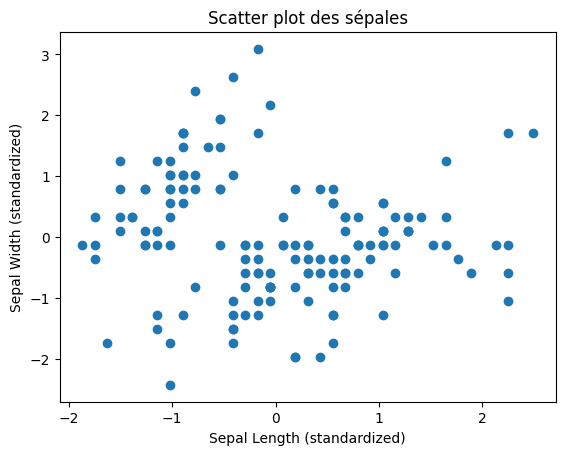

In [10]:
plt.scatter(df_scaled['sepal length (cm)'], df_scaled['sepal width (cm)'])
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Scatter plot des sépales')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df_scaled)

print("Centres des clusters :\n", kmeans.cluster_centers_)

labels = kmeans.labels_
print("Étiquettes des points :\n", labels[:10])

Centres des clusters :
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]
Étiquettes des points :
 [1 2 2 2 1 1 1 1 2 2]


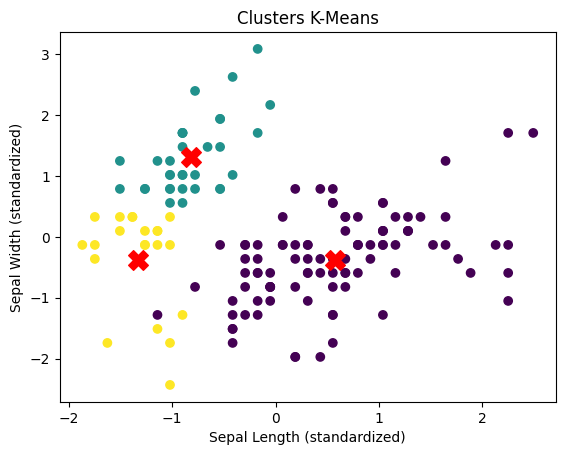

In [13]:
plt.scatter(df_scaled['sepal length (cm)'], df_scaled['sepal width (cm)'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='X', s=200)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Clusters K-Means')
plt.show()

In [15]:
score = silhouette_score(df_scaled, labels)
print("Silhouette Score :", score)

Silhouette Score : 0.4798814508199817


In [16]:
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    score = silhouette_score(df_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.2f}")

k=2, Silhouette Score=0.58
k=3, Silhouette Score=0.48
k=4, Silhouette Score=0.39
k=5, Silhouette Score=0.35
